In [37]:
import pandas as pd

In [38]:
data = pd.read_csv('penguins_size.csv')

In [39]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Univariate

<Axes: >

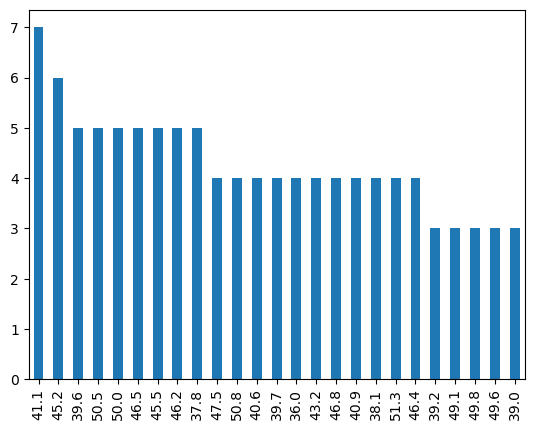

In [40]:
data['culmen_length_mm'].value_counts().head(25).plot.bar()

<Axes: >

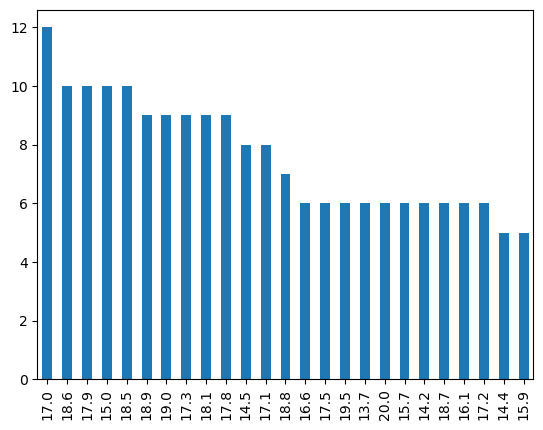

In [41]:
data['culmen_depth_mm'].value_counts().head(25).plot.bar()

<Axes: >

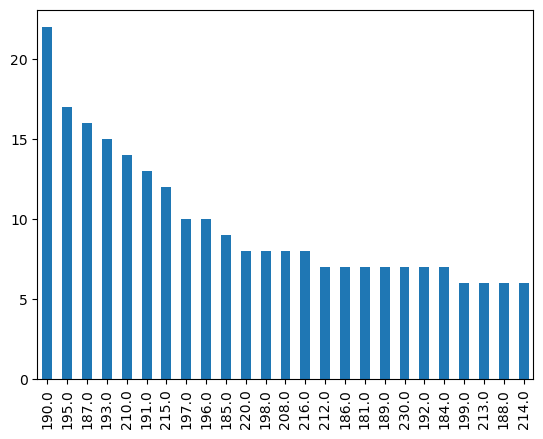

In [42]:
data['flipper_length_mm'].value_counts().head(25).plot.bar()

<Axes: >

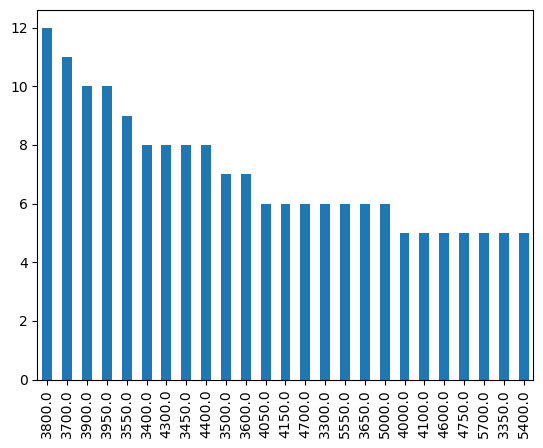

In [43]:
data['body_mass_g'].value_counts().head(25).plot.bar()

<Axes: >

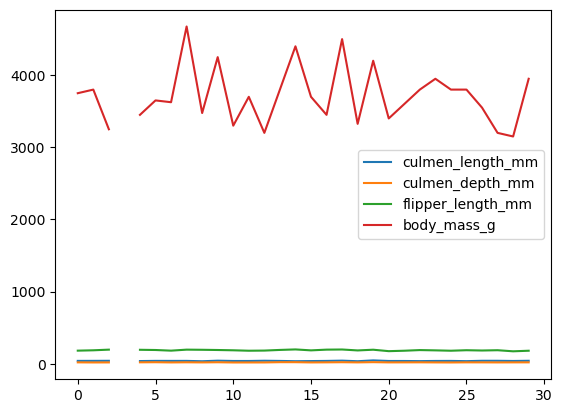

In [44]:
data.head(30).plot.line()

In [45]:
import seaborn as sb

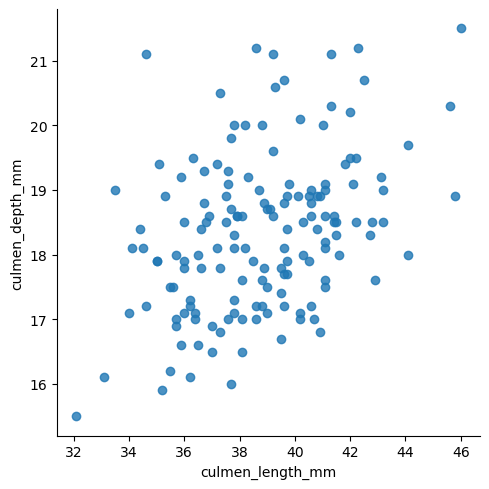

In [46]:
sb.lmplot(x='culmen_length_mm', y='culmen_depth_mm', 
           data=data.loc[data['species'].isin(["Adelie"])], 
           fit_reg=False)

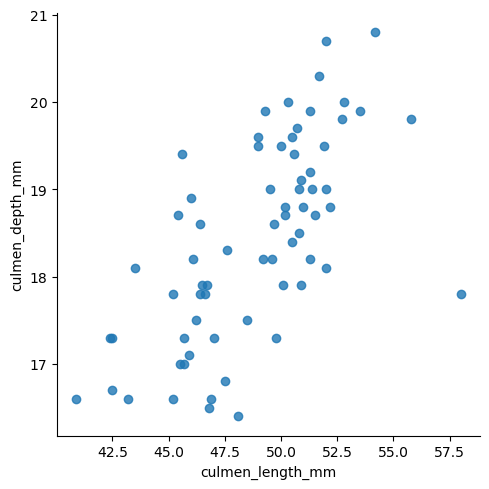

In [47]:
sb.lmplot(x='culmen_length_mm', y='culmen_depth_mm', 
           data=data.loc[data['species'].isin(["Chinstrap"])], 
           fit_reg=False)

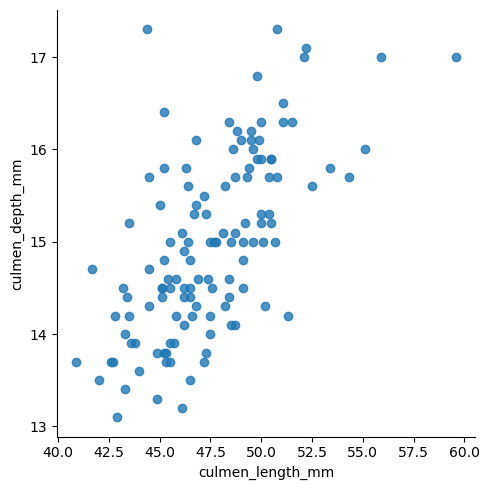

In [48]:
sb.lmplot(x='culmen_length_mm', y='culmen_depth_mm', 
           data=data.loc[data['species'].isin(["Gentoo"])], 
           fit_reg=False)

In [49]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [50]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [51]:
s1 = data.fillna(method="ffill")

In [52]:
s1.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [53]:
missing_values=data.isnull().sum()
missing_values[missing_values>0]/len(data)*100

culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64

<Axes: >

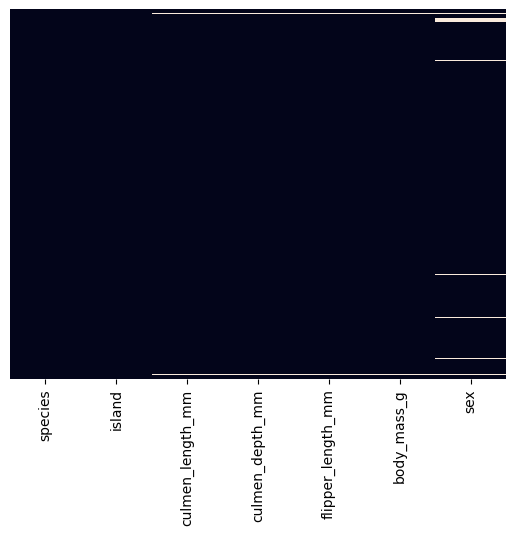

In [54]:
sb.heatmap(data.isnull(),yticklabels=False,cbar=False)

<Axes: >

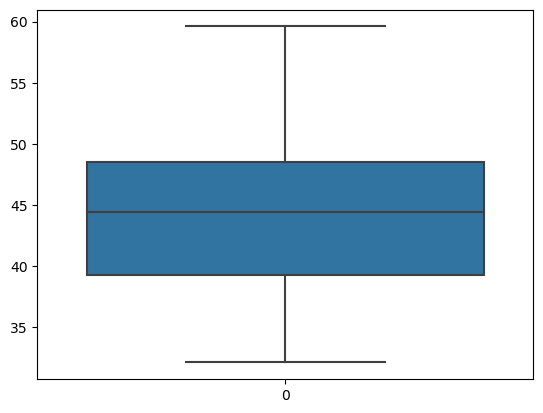

In [55]:
sb.boxplot(data['culmen_length_mm'])

<Axes: >

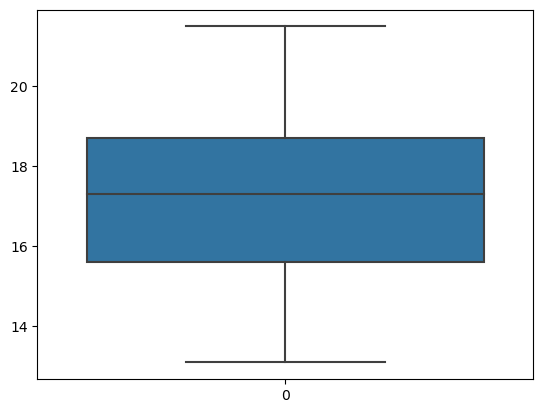

In [56]:
sb.boxplot(data['culmen_depth_mm'])

<Axes: >

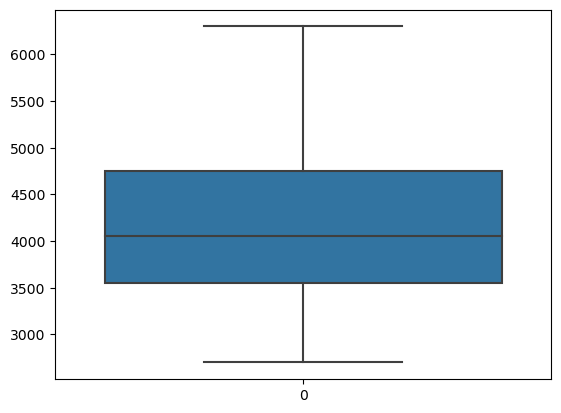

In [57]:
sb.boxplot(data['body_mass_g'])

<Axes: >

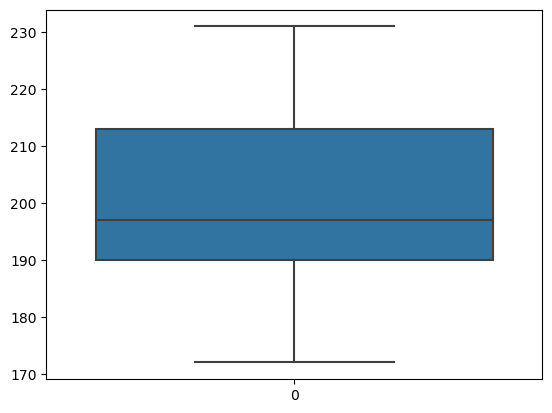

In [58]:
sb.boxplot(data['flipper_length_mm'])

In [59]:
print('skewness culmen length: ',data['culmen_length_mm'].skew())
print('skewness culmen depth: ',data['culmen_depth_mm'].skew())
print('skewness Flipper length: ',data['flipper_length_mm'].skew())
print('skewness boddy mass: ',data['body_mass_g'].skew())

skewness culmen length:  0.05311806699132413
skewness culmen depth:  -0.1434646251943698
skewness Flipper length:  0.34568183286876963
skewness boddy mass:  0.470329330480123


<b>Skewness Values within -1 t0 1 indicates a normal distribution

In [60]:
odata = pd.get_dummies(data, columns = ['island'])
print(odata)

    species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie              39.1             18.7              181.0   
1    Adelie              39.5             17.4              186.0   
2    Adelie              40.3             18.0              195.0   
3    Adelie               NaN              NaN                NaN   
4    Adelie              36.7             19.3              193.0   
..      ...               ...              ...                ...   
339  Gentoo               NaN              NaN                NaN   
340  Gentoo              46.8             14.3              215.0   
341  Gentoo              50.4             15.7              222.0   
342  Gentoo              45.2             14.8              212.0   
343  Gentoo              49.9             16.1              213.0   

     body_mass_g     sex  island_Biscoe  island_Dream  island_Torgersen  
0         3750.0    MALE              0             0                 1  
1         3800.0  FEMAL

In [61]:
odata = odata.iloc[1:]
odata

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE,0,0,1
3,Adelie,NaN,NaN,NaN,NaN,NaN,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,FEMALE,0,0,1
5,Adelie,39.3,20.6,190.0,3650.0,MALE,0,0,1
...,...,...,...,...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN,NaN,1,0,0
340,Gentoo,46.8,14.3,215.0,4850.0,FEMALE,1,0,0
341,Gentoo,50.4,15.7,222.0,5750.0,MALE,1,0,0
342,Gentoo,45.2,14.8,212.0,5200.0,FEMALE,1,0,0


In [62]:
odata['culmen_length_mm'].max()

59.6

In [63]:
odata['culmen_depth_mm'].max()

21.5

In [64]:
odata['flipper_length_mm'].max()

231.0

In [65]:
odata['body_mass_g'].max()

6300.0

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
y=odata['species']
odata = odata.drop('species',axis = 1)

In [69]:
odata = pd.get_dummies(odata, columns = ['sex'])
print(odata)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
3                 NaN              NaN                NaN          NaN   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
339               NaN              NaN                NaN          NaN   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     island_Biscoe  island_Dream  island_Torgersen  sex_.  sex_FEMALE  \
1                0             0      

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(odata.iloc[1:])

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(odata,y ,random_state=104, test_size=0.25, shuffle=True)